In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# df = pd.read_csv('shopping_trends.csv')
df = pd.read_csv('shopping_trends.csv', index_col=False)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [4]:
df.shape

(3900, 19)

In [5]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [6]:
df.count()

Customer ID                 3900
Age                         3900
Gender                      3900
Item Purchased              3900
Category                    3900
Purchase Amount (USD)       3900
Location                    3900
Size                        3900
Color                       3900
Season                      3900
Review Rating               3900
Subscription Status         3900
Payment Method              3900
Shipping Type               3900
Discount Applied            3900
Promo Code Used             3900
Previous Purchases          3900
Preferred Payment Method    3900
Frequency of Purchases      3900
dtype: int64

In [7]:
df['Color'].value_counts()

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Blue         152
Magenta      152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64

In [8]:
features = ['Age','Gender','Item Purchased','Category','Purchase Amount (USD)','Size','Season','Review Rating','Discount Applied','Promo Code Used','Previous Purchases','Preferred Payment Method']

In [9]:
df = df[features]
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Size,Season,Review Rating,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method
0,55,Male,Blouse,Clothing,53,L,Winter,3.1,Yes,Yes,14,Venmo
1,19,Male,Sweater,Clothing,64,L,Winter,3.1,Yes,Yes,2,Cash
2,50,Male,Jeans,Clothing,73,S,Spring,3.1,Yes,Yes,23,Credit Card
3,21,Male,Sandals,Footwear,90,M,Spring,3.5,Yes,Yes,49,PayPal
4,45,Male,Blouse,Clothing,49,M,Spring,2.7,Yes,Yes,31,PayPal


In [10]:
df['Item Purchased'].value_counts()

Item Purchased
Blouse        171
Pants         171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Sandals       160
Socks         159
Skirt         158
Scarf         157
Shorts        157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

In [11]:
df['Category'].value_counts()


Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [12]:
df['Size'].value_counts()

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

In [13]:
df['Season'].value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

In [14]:
df['Discount Applied'].value_counts()

Discount Applied
No     2223
Yes    1677
Name: count, dtype: int64

In [15]:
df['Promo Code Used'].value_counts()

Promo Code Used
No     2223
Yes    1677
Name: count, dtype: int64

In [16]:
df['Preferred Payment Method'].value_counts()

Preferred Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

In [17]:
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Size,Season,Review Rating,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method
0,55,Male,Blouse,Clothing,53,L,Winter,3.1,Yes,Yes,14,Venmo
1,19,Male,Sweater,Clothing,64,L,Winter,3.1,Yes,Yes,2,Cash
2,50,Male,Jeans,Clothing,73,S,Spring,3.1,Yes,Yes,23,Credit Card
3,21,Male,Sandals,Footwear,90,M,Spring,3.5,Yes,Yes,49,PayPal
4,45,Male,Blouse,Clothing,49,M,Spring,2.7,Yes,Yes,31,PayPal


In [18]:
encode_col =  ['Gender', 'Item Purchased', 'Category', 'Size', 'Season', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method']
df_encoded = pd.get_dummies(df, columns=encode_col, drop_first=False)
df_encoded.head()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Female,Gender_Male,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,...,Discount Applied_No,Discount Applied_Yes,Promo Code Used_No,Promo Code Used_Yes,Preferred Payment Method_Bank Transfer,Preferred Payment Method_Cash,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo
0,55,53,3.1,14,False,True,False,False,True,False,...,False,True,False,True,False,False,False,False,False,True
1,19,64,3.1,2,False,True,False,False,False,False,...,False,True,False,True,False,True,False,False,False,False
2,50,73,3.1,23,False,True,False,False,False,False,...,False,True,False,True,False,False,True,False,False,False
3,21,90,3.5,49,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False
4,45,49,2.7,31,False,True,False,False,True,False,...,False,True,False,True,False,False,False,False,True,False


In [19]:
df1 = df
df = df_encoded
df1.tail()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Size,Season,Review Rating,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method
3895,40,Female,Hoodie,Clothing,28,L,Summer,4.2,No,No,32,Venmo
3896,52,Female,Backpack,Accessories,49,L,Spring,4.5,No,No,41,Bank Transfer
3897,46,Female,Belt,Accessories,33,L,Spring,2.9,No,No,24,Venmo
3898,44,Female,Shoes,Footwear,77,S,Summer,3.8,No,No,24,Venmo
3899,52,Female,Handbag,Accessories,81,M,Spring,3.1,No,No,33,Venmo


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 53 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     3900 non-null   int64  
 1   Purchase Amount (USD)                   3900 non-null   int64  
 2   Review Rating                           3900 non-null   float64
 3   Previous Purchases                      3900 non-null   int64  
 4   Gender_Female                           3900 non-null   bool   
 5   Gender_Male                             3900 non-null   bool   
 6   Item Purchased_Backpack                 3900 non-null   bool   
 7   Item Purchased_Belt                     3900 non-null   bool   
 8   Item Purchased_Blouse                   3900 non-null   bool   
 9   Item Purchased_Boots                    3900 non-null   bool   
 10  Item Purchased_Coat                     3900 non-null   bool

In [21]:
df = df.drop(['Gender_Female', 'Discount Applied_No', 'Promo Code Used_No'], axis=1)
df.head()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,...,Season_Summer,Season_Winter,Discount Applied_Yes,Promo Code Used_Yes,Preferred Payment Method_Bank Transfer,Preferred Payment Method_Cash,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo
0,55,53,3.1,14,True,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,True
1,19,64,3.1,2,True,False,False,False,False,False,...,False,True,True,True,False,True,False,False,False,False
2,50,73,3.1,23,True,False,False,False,False,False,...,False,False,True,True,False,False,True,False,False,False
3,21,90,3.5,49,True,False,False,False,False,False,...,False,False,True,True,False,False,False,False,True,False
4,45,49,2.7,31,True,False,False,True,False,False,...,False,False,True,True,False,False,False,False,True,False


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 50 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     3900 non-null   int64  
 1   Purchase Amount (USD)                   3900 non-null   int64  
 2   Review Rating                           3900 non-null   float64
 3   Previous Purchases                      3900 non-null   int64  
 4   Gender_Male                             3900 non-null   bool   
 5   Item Purchased_Backpack                 3900 non-null   bool   
 6   Item Purchased_Belt                     3900 non-null   bool   
 7   Item Purchased_Blouse                   3900 non-null   bool   
 8   Item Purchased_Boots                    3900 non-null   bool   
 9   Item Purchased_Coat                     3900 non-null   bool   
 10  Item Purchased_Dress                    3900 non-null   bool

In [23]:
# Scaling the attributes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
print(X_scaled)

[[ 0.71891344 -0.28562864 -0.90758357 ... -0.4414215  -0.45831512
   2.26967389]
 [-1.64862924  0.17885219 -0.90758357 ... -0.4414215  -0.45831512
  -0.44059193]
 [ 0.39008807  0.55888195 -0.90758357 ... -0.4414215  -0.45831512
  -0.44059193]
 ...
 [ 0.12702777 -1.13013923 -1.18686209 ... -0.4414215  -0.45831512
   2.26967389]
 [-0.00450238  0.72778407  0.06989124 ... -0.4414215  -0.45831512
   2.26967389]
 [ 0.52161822  0.89668619 -0.90758357 ... -0.4414215  -0.45831512
   2.26967389]]


In [24]:
from sklearn.cluster import KMeans
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)
df.head()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,...,Season_Winter,Discount Applied_Yes,Promo Code Used_Yes,Preferred Payment Method_Bank Transfer,Preferred Payment Method_Cash,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Cluster
0,55,53,3.1,14,True,False,False,True,False,False,...,True,True,True,False,False,False,False,False,True,0
1,19,64,3.1,2,True,False,False,False,False,False,...,True,True,True,False,True,False,False,False,False,0
2,50,73,3.1,23,True,False,False,False,False,False,...,False,True,True,False,False,True,False,False,False,0
3,21,90,3.5,49,True,False,False,False,False,False,...,False,True,True,False,False,False,False,True,False,1
4,45,49,2.7,31,True,False,False,True,False,False,...,False,True,True,False,False,False,False,True,False,0


In [25]:
df.tail()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,...,Season_Winter,Discount Applied_Yes,Promo Code Used_Yes,Preferred Payment Method_Bank Transfer,Preferred Payment Method_Cash,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Cluster
3895,40,28,4.2,32,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,0
3896,52,49,4.5,41,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,3
3897,46,33,2.9,24,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,3
3898,44,77,3.8,24,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1
3899,52,81,3.1,33,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,3


In [33]:
df1.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Size,Season,Review Rating,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method
0,55,Male,Blouse,Clothing,53,L,Winter,3.1,Yes,Yes,14,Venmo
1,19,Male,Sweater,Clothing,64,L,Winter,3.1,Yes,Yes,2,Cash
2,50,Male,Jeans,Clothing,73,S,Spring,3.1,Yes,Yes,23,Credit Card
3,21,Male,Sandals,Footwear,90,M,Spring,3.5,Yes,Yes,49,PayPal
4,45,Male,Blouse,Clothing,49,M,Spring,2.7,Yes,Yes,31,PayPal


In [26]:
df['Cluster'].value_counts()

Cluster
0    1737
3    1240
1     599
2     324
Name: count, dtype: int64

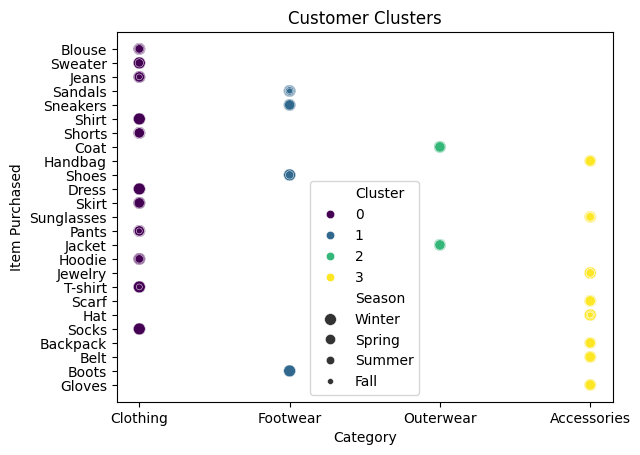

In [48]:
import seaborn as sns
# Plot clusters based on Purchase Amount and Age
sns.scatterplot(x=df1["Category"], y=df1["Item Purchased"], hue=df["Cluster"], palette="viridis", size='Season', data=df1)
plt.title("Customer Clusters")
plt.show()

In [28]:
# # saving the model
# import pickle
# with open('model.pkl', 'wb') as f:
#     pickle.dump(kmeans,f)